# Analyse du pendule simple

Commençons par importer les librairies usuelles de calcul scientifique et de dessin

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

## L'équation du pendule

On considère un pendule simple de masse ponctuelle $m$ située au point $M$ est soumise à son poids $m\mathbf{g}$ et à la tension $\mathbf{T}$ du cable de longueur $L$ qui relie cette masse au point $O$. La position de $M$ est repérée par l'angle $\theta (t)$ entre la verticale et le cable. Par projection sur l'axe porté par $\mathbf{e}_\theta$ dans le système de coordonnée polaire, le théorème de la résultante dynamique permet d'écrire:

$$ mL \theta''(t) = -mg\sin(\theta(t)).$$

On obtient ainsi l'équation différentielle satisfaite par $\theta(t)$:

$$ \theta''(t) = -\omega^2 \sin(\theta(t)), \quad\quad\quad (3.1) $$

avec $\omega = \sqrt{\frac g L}$. La position initiale du pendule est notée $\theta_0$ et sa vitesse initiale est $\theta_0'=\dot{\theta}_0$. Le problème à résoudre s'écrit donc:

$$\left\{\begin{array}{ll}
\theta''(t) + \omega^2 \sin(\theta(t)) = 0,\\
\theta(0) = \theta_0, \; \theta'(0) =\dot{\theta}_0 .
\end{array}\right.\quad\quad\quad (3.2)$$

Le problème $(3.2)$ est maintenant reformulé sous la forme d'un système d'ordre $1$. On pose $x_1(t) = \theta(t)$ et $x_2(t) = \theta'(t)$ pour obtenir

$$\left\{\begin{array}{ll}
x_1'(t) = x_2(t),
\\ x_2'(t) = \displaystyle -\omega^2\sin(x_1(t)),
\end{array}\right.$$

de sorte qu'avec $X = (x_1,x_2)^t$, le système $(3.2)$ devient

$$\left\{\begin{array}{ll}
X'(t) = F(X(t)),
\\ X(0) = X_0.
\end{array}\right.$$

> **A faire :** Pour mettre en oeuvre les méthodes de calcul approché des solutions de $(3.3)$, écrire une fonction qui calcule $F(X)$.



Constant

In [2]:
g = 9.81
L = 5

In [3]:
def function(X):
    X0,X1 = X
    result = np.zeros(2)
    result[0] = X1
    result[1] = - g*np.sin(X0)/L
    jacob = np.array([[0,1],[-g*np.cos(X0)/L,0]])
    return result,jacob

> **A faire :** Écrire les fonctions mettant en oeuvre les méthodes d'Euler explicite, de Heun et de Runge-Kutta d'ordre 2 et 4. 

Euler Explicite

In [4]:
def EulerExplicite(T,dt,f,yini):
    niter = int(T/dt)+1
    size = len(yini)
    result = np.zeros((niter,size))
    result[0] = yini
    y = yini
    for i in range(niter-1):
        y = y + dt * f(y)[0]
        result[i+1] = y
    return result

Heun

In [5]:
def Heun(T,dt,f,yini):
    niter = int(T/dt)+1
    size = len(yini)
    result = np.zeros((niter,size))
    result[0] = yini
    y = result[0]
    y = np.array(y)
    fy,dy = f(y)
    for i in range(niter-1):
        fy,_ = f(y)
        yp = y + dt*fy
        fyp,_ = f(yp)
        y = y + (dt/2)*(fy+fyp)
        result[i+1] = y
    return result

RK2

In [6]:
def RK2(T,dt,f,yini):
    niter = int(T/dt)+1
    size = len(yini)
    result = np.zeros((niter,size))
    result[0] = yini
    y = yini
    for i in range(niter-1):
        k1 = f(y)[0]
        k2 = f(y + dt*k1/2)[0]
        y = y + dt * k2
        result[i+1] = y
    return result

RK4

In [7]:
def RK4(T,dt,f,yini):
    niter = int(T/dt)+1
    size = len(yini)
    result = np.zeros((niter,size))
    result[0] = yini
    y = yini
    for i in range(niter-1):
        k1 = f(y)[0]
        k2 = f(y + dt*k1/4)[0]
        k3 = f(y + dt*k2/4)[0]
        k4 = f(y + dt*k3/4)[0]
        y = y + dt * (k4+2*k3+2*k2+k1)/6
        result[i+1] = y
    return result

> **A faire :** Écrire un programme principal qui calcule et représente les solutions approchées par ces quatre méthodes, sur l'intervalle $[0,8]$, avec un pas $h = \frac 8 {200}$. Vous comparerez notamment les périodes obtenues.

Constant

In [8]:
T = 8
dt = 8/200
Y0 = np.array([np.pi/2,0])

Programme

<IPython.core.display.Javascript object>


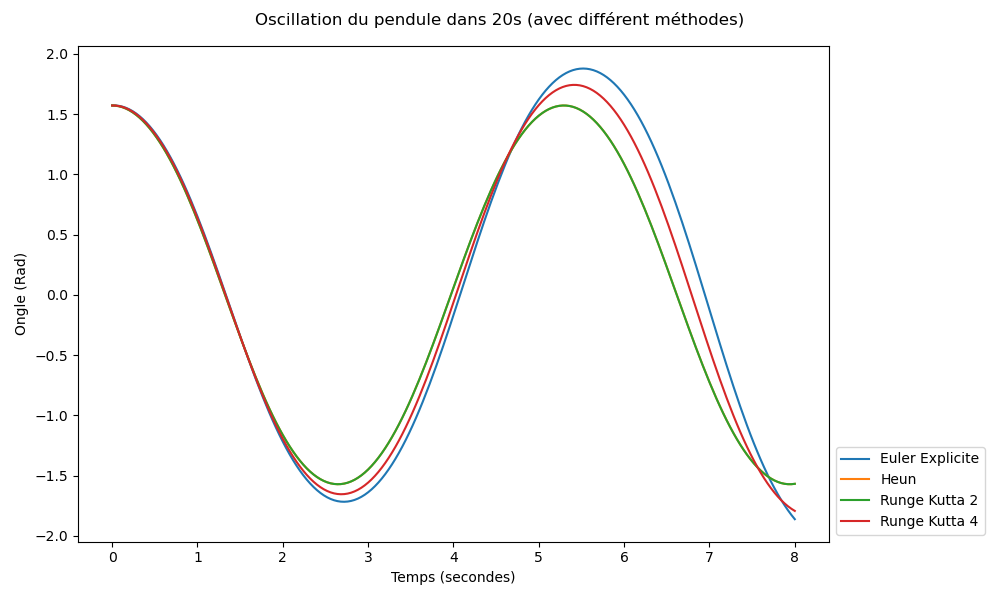

In [9]:
Test_EE = EulerExplicite(T,dt,function,Y0)
Test_Heun = Heun(T,dt,function,Y0)
Test_RK2 = RK2(T,dt,function,Y0)
Test_RK4 = RK4(T,dt,function,Y0)
plt.figure('Oscillation du pendule dans 20s (avec différent méthodes)', figsize = (10,6))
plt.suptitle('Oscillation du pendule dans 20s (avec différent méthodes)')
abcisse = np.linspace(0,8,len(Test_EE))
plt.plot(abcisse,Test_EE[:,0], label = 'Euler Explicite')
plt.plot(abcisse,Test_Heun[:,0],label = 'Heun')
plt.plot(abcisse,Test_RK2[:,0],label = 'Runge Kutta 2')
plt.plot(abcisse,Test_RK4[:,0],label = 'Runge Kutta 4')
plt.xlabel('Temps (secondes)')
plt.ylabel('Ongle (Rad)')
plt.legend(loc = 'lower left', bbox_to_anchor = (1,0))
plt.tight_layout()
plt.show()

Pour cette équation, l'énergie mécanique $\mathcal{E}(t)$ est définie par
$$
\mathcal{E}(t) = \frac{1}{2} m L^2 (\theta'(t))^2 - m g L \cos \theta(t).
$$
Ce système étant conservatif, cette énergie est conservée au cours du temps.

> **A faire :** Pour chacun des schémas ci-dessus, tracer l'évolution de $\displaystyle \frac {\mathcal{E}} m$ sur $(0,T)$ pour un pas de temps $h=\frac 8 {200}$.
Commentez les résultats.

In [10]:
EEE = [L**2*(x[1])**2/2 - g*L*np.cos(x[0]) for x in Test_EE]
EHeun = [L**2*(x[1])**2/2 - g*L*np.cos(x[0]) for x in Test_Heun]
ERK2 = [L**2*(x[1])**2/2 - g*L*np.cos(x[0]) for x in Test_RK2]
ERK4 = [L**2*(x[1])**2/2 - g*L*np.cos(x[0]) for x in Test_RK4]

<IPython.core.display.Javascript object>


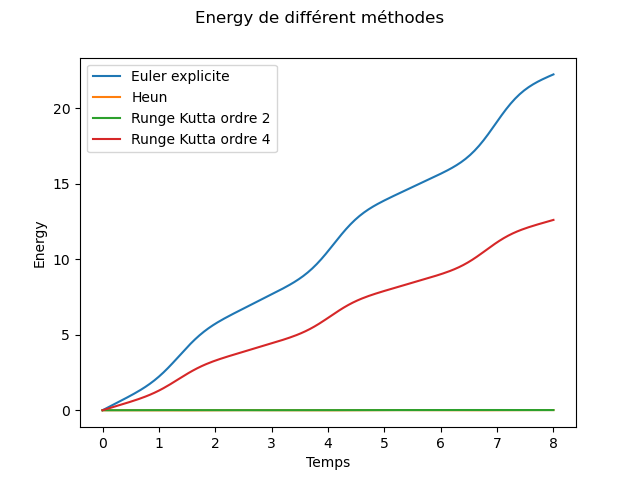

In [11]:
plt.figure('Energy de différent méthodes')
plt.suptitle('Energy de différent méthodes')
plt.plot(abcisse,EEE,label ='Euler explicite')
plt.plot(abcisse,EHeun,label ='Heun')
plt.plot(abcisse,ERK2,label ='Runge Kutta ordre 2')
plt.plot(abcisse,ERK4,label ='Runge Kutta ordre 4')
plt.xlabel('Temps')
plt.ylabel('Energy')
plt.legend()
plt.show()

## Excitation du pendule

On s'intéresse maintenant au cas du pendule excité, c'est à dire soumis à une force extérieure de la forme
$$ f(t) = \cos(\omega t) \mathbf{e}_{\theta}.$$
La dynamique du système devient alors
$$\left\{\begin{array}{ll}
\theta''(t) + \omega^2 \sin(\theta(t)) = \cos(\omega t),\\
\theta(0) = \theta_0, \; \theta'(0) =\dot{\theta}_0 .
\end{array}\right.\quad\quad\quad (4)$$
aux vues des résultats précédents, nous allons considérer dans la suite la méthode Heun. Dans le cas d'un problème non autonome de la forme $X'(t)= F(X(t)) + b(t)$, le schéma de Heun, de pas constant $h$ s'écrit
$$
X_{n+1}  = X_n + \frac{h}{2} \big( F(X_n)  +  F(X_n + h \left( b(t_n) + F(X_n) \right)   \big) + \frac{h}{2} \big( b(t_n) + b(t_{n+1})  \big).
$$

> **A faire :** Modifier le code de l'algorithme de Heun afin de prendre en compte le second membre. Effectuer une analyse en fonction de $\omega$. En particulier, prendre des valeurs telles que $\omega \to \omega_0$.

Force

In [12]:
def force(t):
    w = np.sqrt(g/L)
    force = np.cos(w*t)
    return force

Heun Affine

In [13]:
def HeunAffine(T,dt,f,b,yini):
    niter = int(T/dt)+1
    size = len(yini)
    result = np.zeros((niter,size))
    result[0] = yini
    y = result[0]
    y = np.array(y)
    fy,dy = f(y)
    for i in range(niter-1):
        fy,_ = f(y)
        b1 = np.array([0,b((i+1)*dt)])
        b2 = np.array([0,b((i+2)*dt)])
        yp = y + dt*(fy+b1)
        fyp,_ = f(yp)
        y = y + (dt/2)*(fy+fyp) + (dt/2)*(b1+b2)
        result[i+1] = y
    return result

Test

<IPython.core.display.Javascript object>


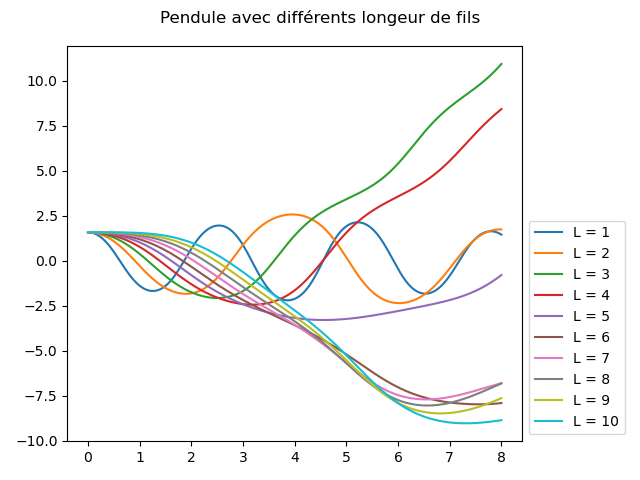

In [14]:
Y0 = np.array([np.pi/2,0])
plt.figure('Pendule avec différents longeur de fils')
plt.suptitle('Pendule avec différents longeur de fils')
for i in range(1,11):
    L = i
    Test_HA = HeunAffine(T,dt,function,force,Y0)
    plt.plot(abcisse,Test_HA[:,0],label =f'L = {i}')
plt.legend(loc ='lower left', bbox_to_anchor = (1,0))
plt.tight_layout()
plt.show()

>  Donner une interprétation des résultats observés. 

## Portrait de phase
Nous allons maintenant tracer le portrait de phase pour l'équation du pendule. Il s'agit de tracer sur un même graphe les courbes $\{ (\theta(t),\theta'(t), \ t \in I \}$, où $I$ est le domaine de définition de la solution, pour plusieurs données initiales. On fera varier la donnée initiale $\theta(0)$ de $-10$ à $10$ et $\theta'(0)$ de $-7$ à $7$.

>  **A faire:** Tracer le portrait de phase en utilisant la méthode de Heun. 

<IPython.core.display.Javascript object>


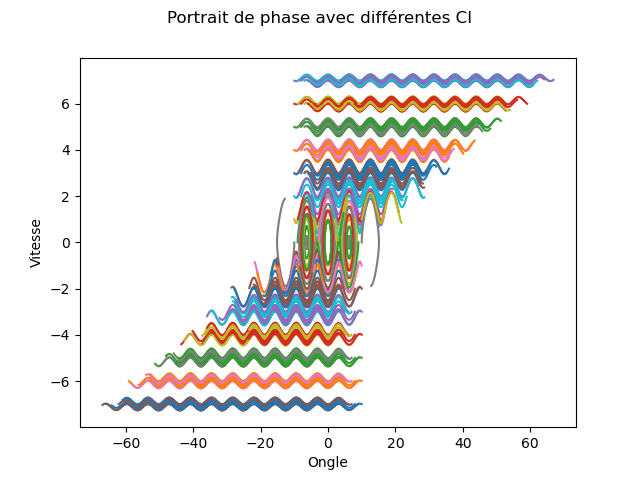

In [15]:
plt.figure('Portrait de phase avec différentes CI')
plt.suptitle('Portrait de phase avec différentes CI')
for i in range(-10,11):
    for j in range(-7,8):
        Y0 = [i,j]
        Test_Heun = Heun(T,dt,function,Y0)
        plt.plot(Test_Heun[:,0],Test_Heun[:,1])
plt.xlabel('Ongle')
plt.ylabel('Vitesse')
plt.show()

## Systèmes hamiltoniens
L'équation du pendule fait partie d’une classe de problèmes provenant de la mécanique Hamiltonienne qui se mettent sous la forme (en dimension $1$) :
$$
\left \{
\begin{array}{l}
\displaystyle p' = -\frac{\partial H}{\partial q}(p,q)\\
\displaystyle q' = \frac{\partial H}{\partial p}(p,q)
\end{array}
\right.
$$
La particularité de ces systèmes est que le Hamiltonien, $H$, est conservé au cours de l'évolution. Au niveau mécanique, ceci correspond à la conservation de l'énergie mécanique que nous avons déjà vu.
Lorsque l'on intègre des systèmes de ce type, il est préférable d'adopter un schéma pour lequel $H$ reste borné.

Implémenter le schéma suivant, dit Euler symplectique :
$$
\left \{
\begin{array}{l}
\displaystyle p^{n+1} = p^n - h \frac{\partial H}{\partial q}(p^{n+1},q^n)\\
\displaystyle q^{n+1} = q^n + h \frac{\partial H}{\partial p}(p^{n+1},q^n)
\end{array}
\right.
$$
Ce schéma est semi-implicite (il n'est implicite qu'en la variable $p$) dans le cas général. Dans le cadre qui nous intéresse, il est explicite.
>**A faire** Programmer le schéma d'Euler symplectique et tracer l'évolution de l'énergie pour celui-ci. Commenter les résultats.

Euler symplectique

In [16]:
def H(X):
    p,q = X
    result = g*np.cos(p)/L - q**2/2
    dp = q
    dq = -g*np.sin(p)/L
    return result, dp, dq

In [17]:
def EulerSymp(T, dt, H, yini):
    niter = int(T/dt)+1
    size = len(yini)
    result = np.zeros((niter,size))
    result[0] = yini
    y = yini
    for i in range(niter-1):
        y[0] = y[0] + dt*y[1]
        y[1] = y[1] - dt*g*np.sin(y[0])/L
        result[i+1] = y
    return result

Test


<IPython.core.display.Javascript object>


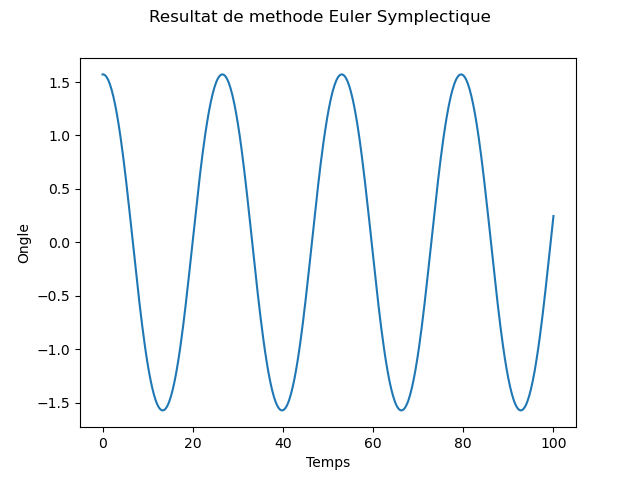

In [18]:
T = 20
dt = 8/200
Y0 = np.array([np.pi/2,0])
g = 9.81
L = 5
Test_symp = EulerSymp(T, dt, H, Y0)
plt.figure('Resultat de methode Euler Symplectique')
plt.suptitle('Resultat de methode Euler Symplectique')
abcisse = np.linspace(0,100,len(Test_symp))
plt.plot(abcisse,Test_symp[:,0])
plt.xlabel('Temps')
plt.ylabel('Ongle')
plt.show()

<IPython.core.display.Javascript object>


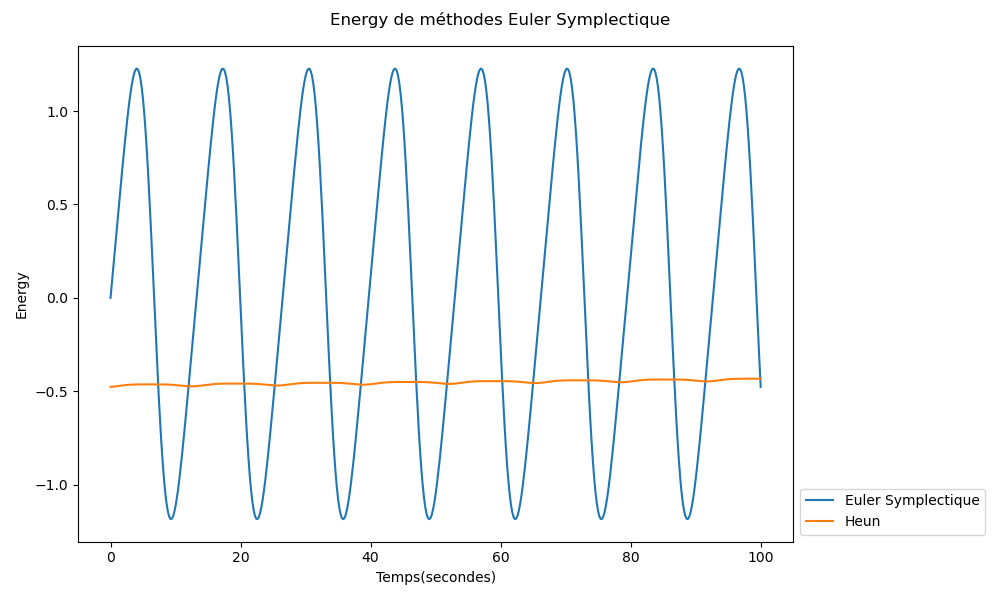

In [19]:
Energy = [(L**2*y[1]**2/2 - g*L*np.cos(y[0])) for y in Test_symp]
Testlong_Heun = Heun(T,dt,function,Y0)
ElongHeun = [L**2*(x[1])**2/2 - g*L*np.cos(x[0]) for x in Testlong_Heun]
plt.figure('Energy de méthodes Euler Symplectique', figsize = (10,6))
plt.suptitle('Energy de méthodes Euler Symplectique')
plt.plot(abcisse,Energy, label = 'Euler Symplectique')
plt.plot(abcisse,ElongHeun, label = 'Heun')
plt.xlabel('Temps(secondes)')
plt.ylabel('Energy')
plt.legend(loc = 'lower left', bbox_to_anchor = (1,0))
plt.tight_layout()
plt.show()
